Get the data from the library - jitterheadcount

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv"
import pandas as pd
import numpy as np


jitter_head = pd.read_csv(fileName)
print(jitter_head.head())

  GameCode DateFormat  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0       BA  9/16/2011     6          0           0             1          0   
1       BA  9/16/2011     7          0           0             1          0   
2       BA  9/16/2011     8          0           0             1          0   
3       BA  9/16/2011     9          0           0             1          0   
4       BA  9/16/2011    10          0           1             0          0   

   DayOfWeek  DayNumber  
0          6         47  
1          6         47  
2          6         47  
3          6         47  
4          6         47  


GameCode: 2 digit game code. 
BA: Baccarat
C4: Blackjack variant
CR: Craps
DH: Blackjack variant
FP: Four Card Poker
LI: Let it Ride
MI: Omaha Hi-Low
MQ:  Blackjack variant
MR: Mini-Baccarat
MS: Mississippi Stud
ND: Blackjack variant
PA: Pai Gow Tiles
PG: Pai Gow
RO: Roulette
RR: Electronic Roulette
S6: Big Six
SH: Blackjack variant
TH: Blackjack variant
TL: Blackjack variant
TP: Texas Hold'em Poker
UT: Ultimate Texas Hold'em
WR: Casino War
DateFormat: Date
Hour: 0-23 of the day
TabelsOcc:  Number of Tables Occupied in the casino
TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.
Tables Closed: Number of tables closed in the casino.
HeadCount: Total Count of people at the hour, day, and table type
DayOfWeek: 1-7.  1 = Sunday, 7 = Saturday.
DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.

<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>4 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

In [2]:
print(jitter_head.describe())
print(jitter_head.dtypes)
print(jitter_head.shape)

                Hour      TablesOcc     TablesOpen   TablesClosed  \
count  175677.000000  175677.000000  175677.000000  175677.000000   
mean       11.504431       2.074591       2.555804       1.853430   
std         6.922330       3.307518       3.673229       2.993767   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       1.000000       0.000000   
50%        12.000000       1.000000       1.000000       1.000000   
75%        18.000000       2.000000       3.000000       3.000000   
max        23.000000      24.000000      24.000000      23.000000   

           HeadCount      DayOfWeek      DayNumber  
count  175677.000000  175677.000000  175677.000000  
mean        7.390228       3.992953     183.434303  
std        12.458613       1.997989     105.702167  
min         0.000000       1.000000       1.000000  
25%         0.000000       2.000000      92.000000  
50%         3.000000       4.000000     183.000000  
75%    

Let's find out how many of each there are

In [3]:
print(jitter_head.head())

  GameCode DateFormat  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0       BA  9/16/2011     6          0           0             1          0   
1       BA  9/16/2011     7          0           0             1          0   
2       BA  9/16/2011     8          0           0             1          0   
3       BA  9/16/2011     9          0           0             1          0   
4       BA  9/16/2011    10          0           1             0          0   

   DayOfWeek  DayNumber  
0          6         47  
1          6         47  
2          6         47  
3          6         47  
4          6         47  


Let's do some plotting

Text(0.5, 0, 'Hour')

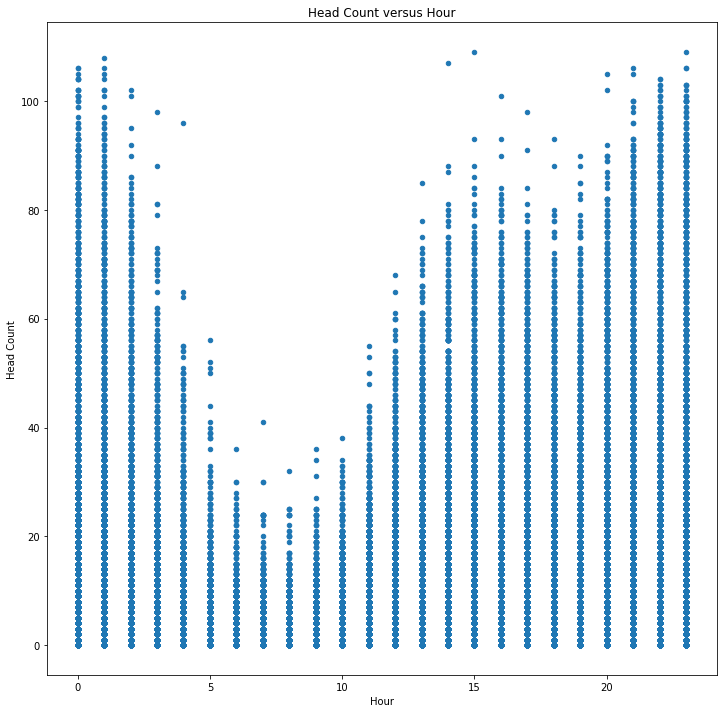

In [4]:
import seaborn as sbn
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(12, 12)).gca() # define axis
jitter_head.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax)
ax.set_title('Head Count versus Hour') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Hour')

It appears that the most popular times are roughly 2PM (14) to 2AM (2) - with a slight drop off during dinner time - 5PM (17) to 7PM (19).

Let's take a look at days of the week and their headcount...

Text(0.5, 0, 'Day Of Week')

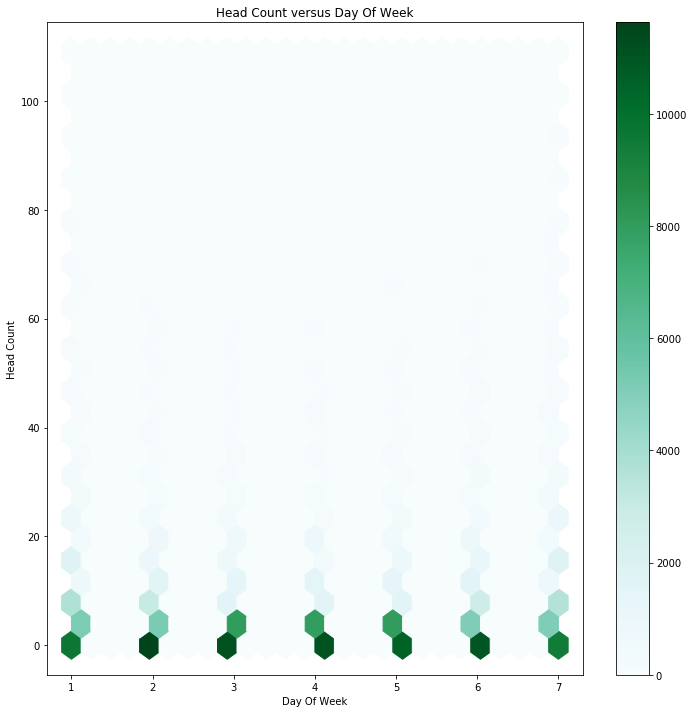

In [5]:
ax = plt.figure(figsize=(12, 12)).gca() # define axis
jitter_head.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', gridsize = 25, ax = ax)
ax.set_title('Head Count versus Day Of Week') # Give the plot a main title
ax.set_ylabel('Head Count')# Set text for y axis
ax.set_xlabel('Day Of Week')

The above graph isn't especially illuminating.


Seems like the first thing to do is to look at headcount per game type. Let's see what's popular and what isn't. We will look at headcount versus day of week, broken into game type.

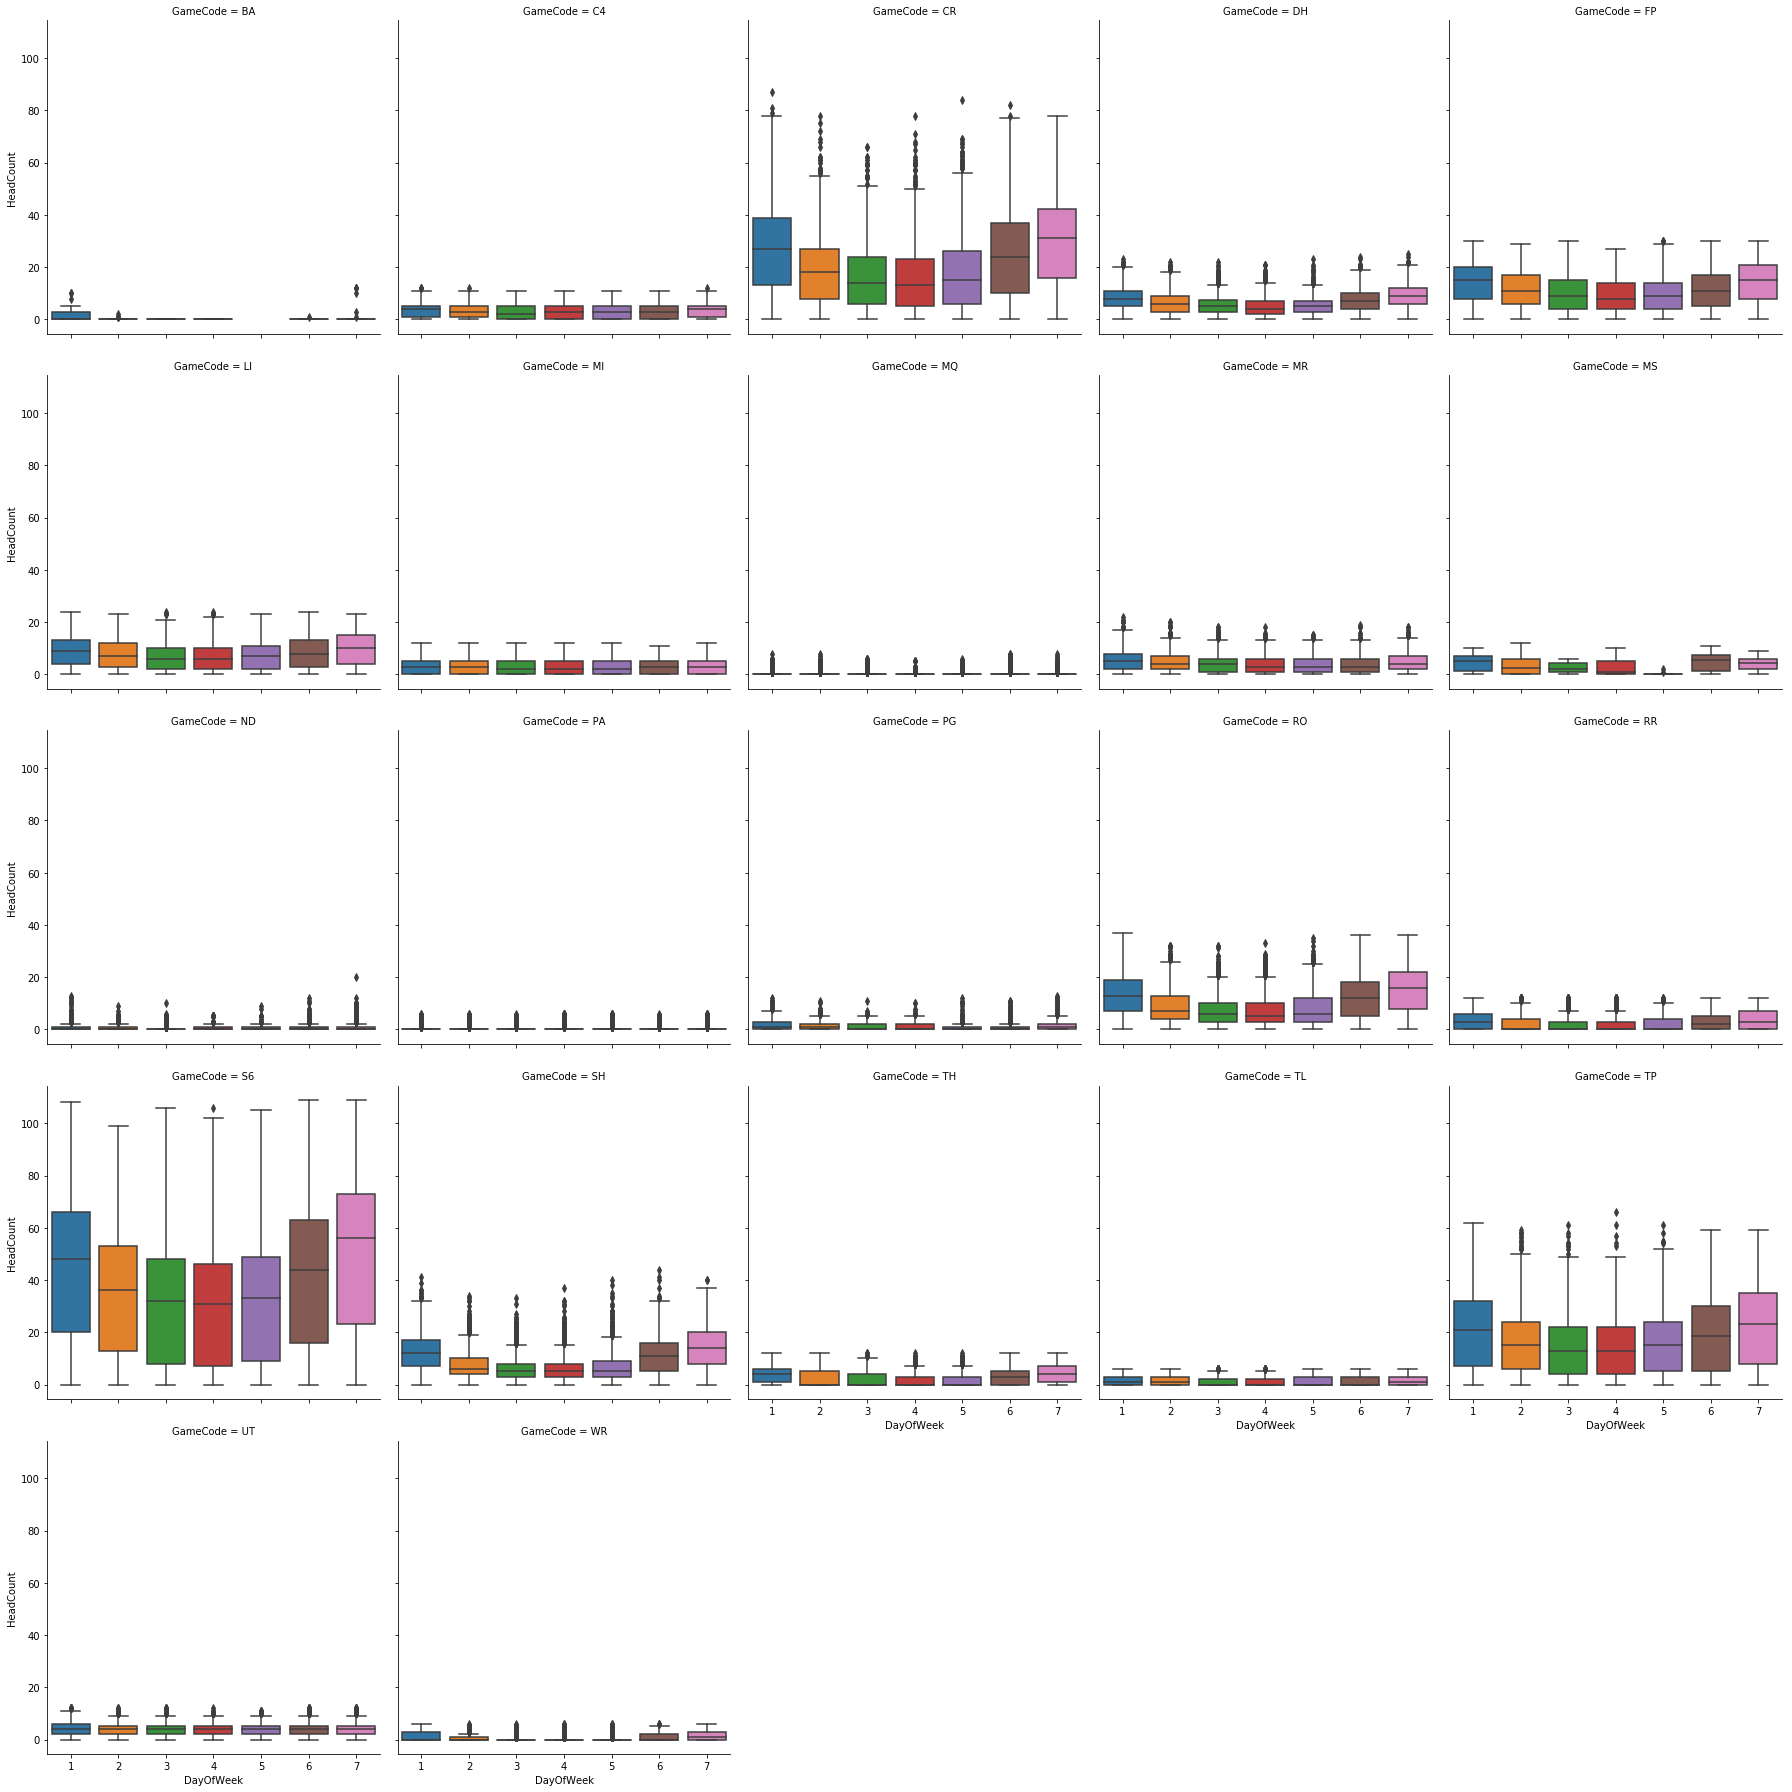

In [6]:
##ax = plt.figure(figsize=(12, 12)).gca()
sbn.catplot(x = "DayOfWeek", y = "HeadCount", data = jitter_head, col = "GameCode", col_wrap = 5, kind = "box")

Looks like Craps(CR), Big Six (S6) and Texas Hold 'em (TP) are the most popular. With the blackjack variant SH maybe fourth.

It also looks like day Sunday (day 1) and Saturday (day 7) are the most popular days. Pretty much what one would expect.


*****************

Now, let's see if the tables are opened and occupied at reasonable intervals. I would expect that a well-run casino would not have a big difference in the tables opened versus tables occupied. 



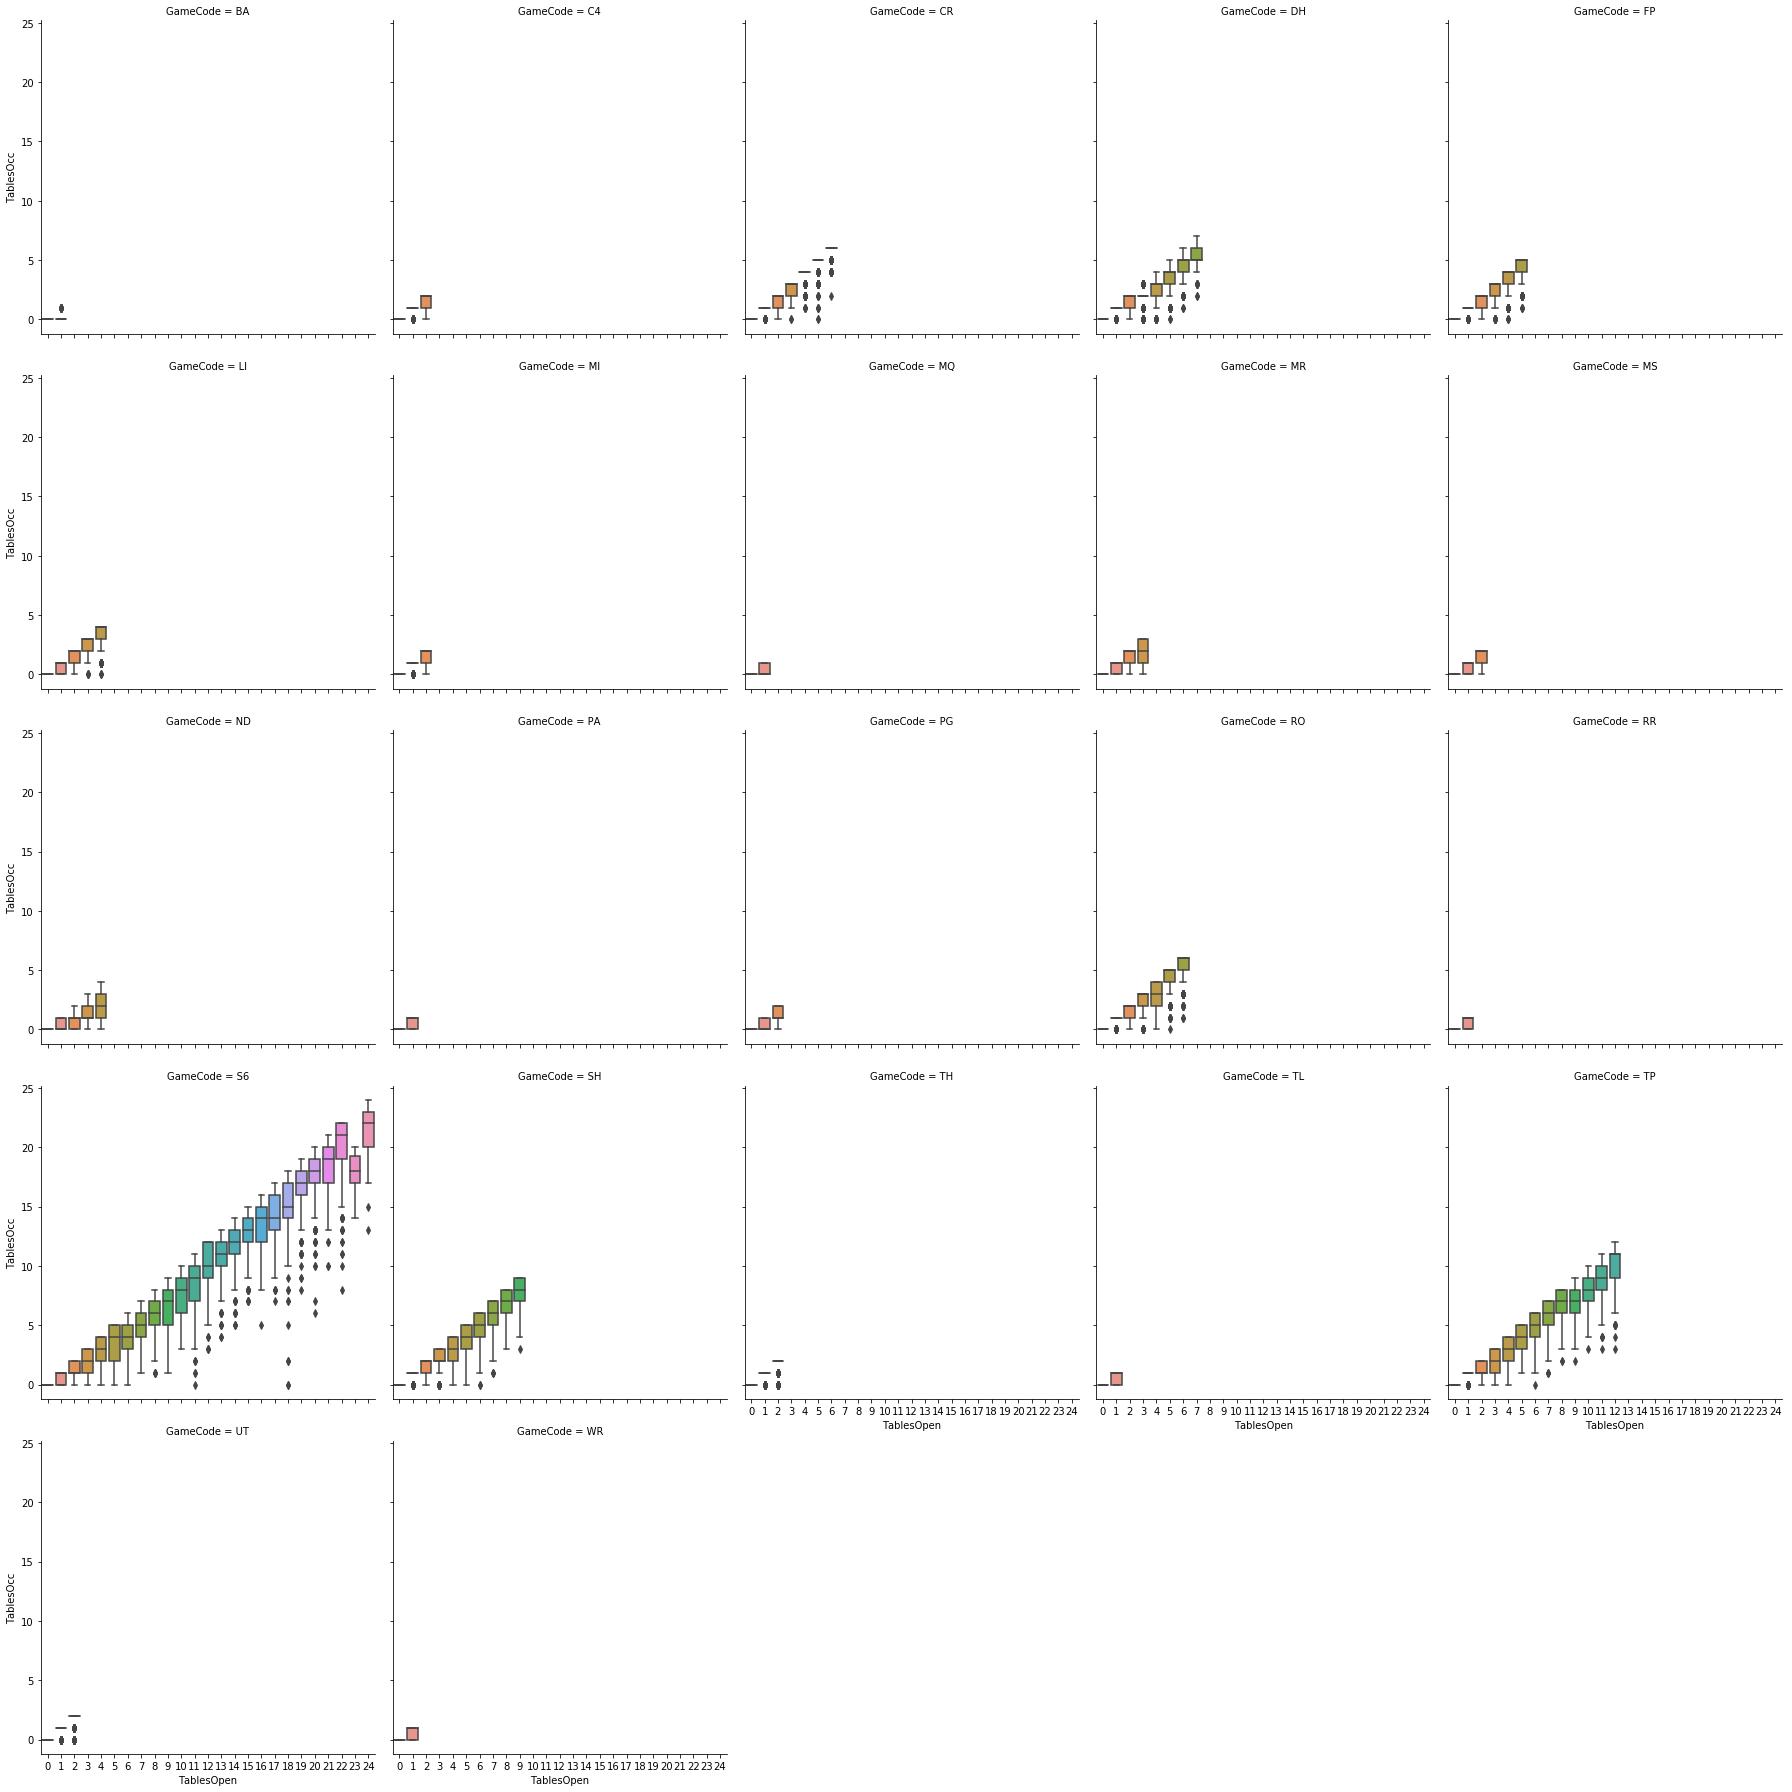

In [7]:
sbn.catplot(x = "TablesOpen", y = "TablesOcc", data = jitter_head, col = "GameCode", col_wrap = 5, kind = "box")

Takeaways from the above: A lot of tables are devoted to the most popular games. That makes sense. And there is some variation in how many are occupied versus how many are closed - which makes sense.

But there is a lot of disconnect in the tables opened versus tables occupied in Big Six, and to a lesser degree in Texas Hold 'Em.

That may be something to investigate.

Now let's look at headcount by hour - what are the most popular times? Do they vary by game? 

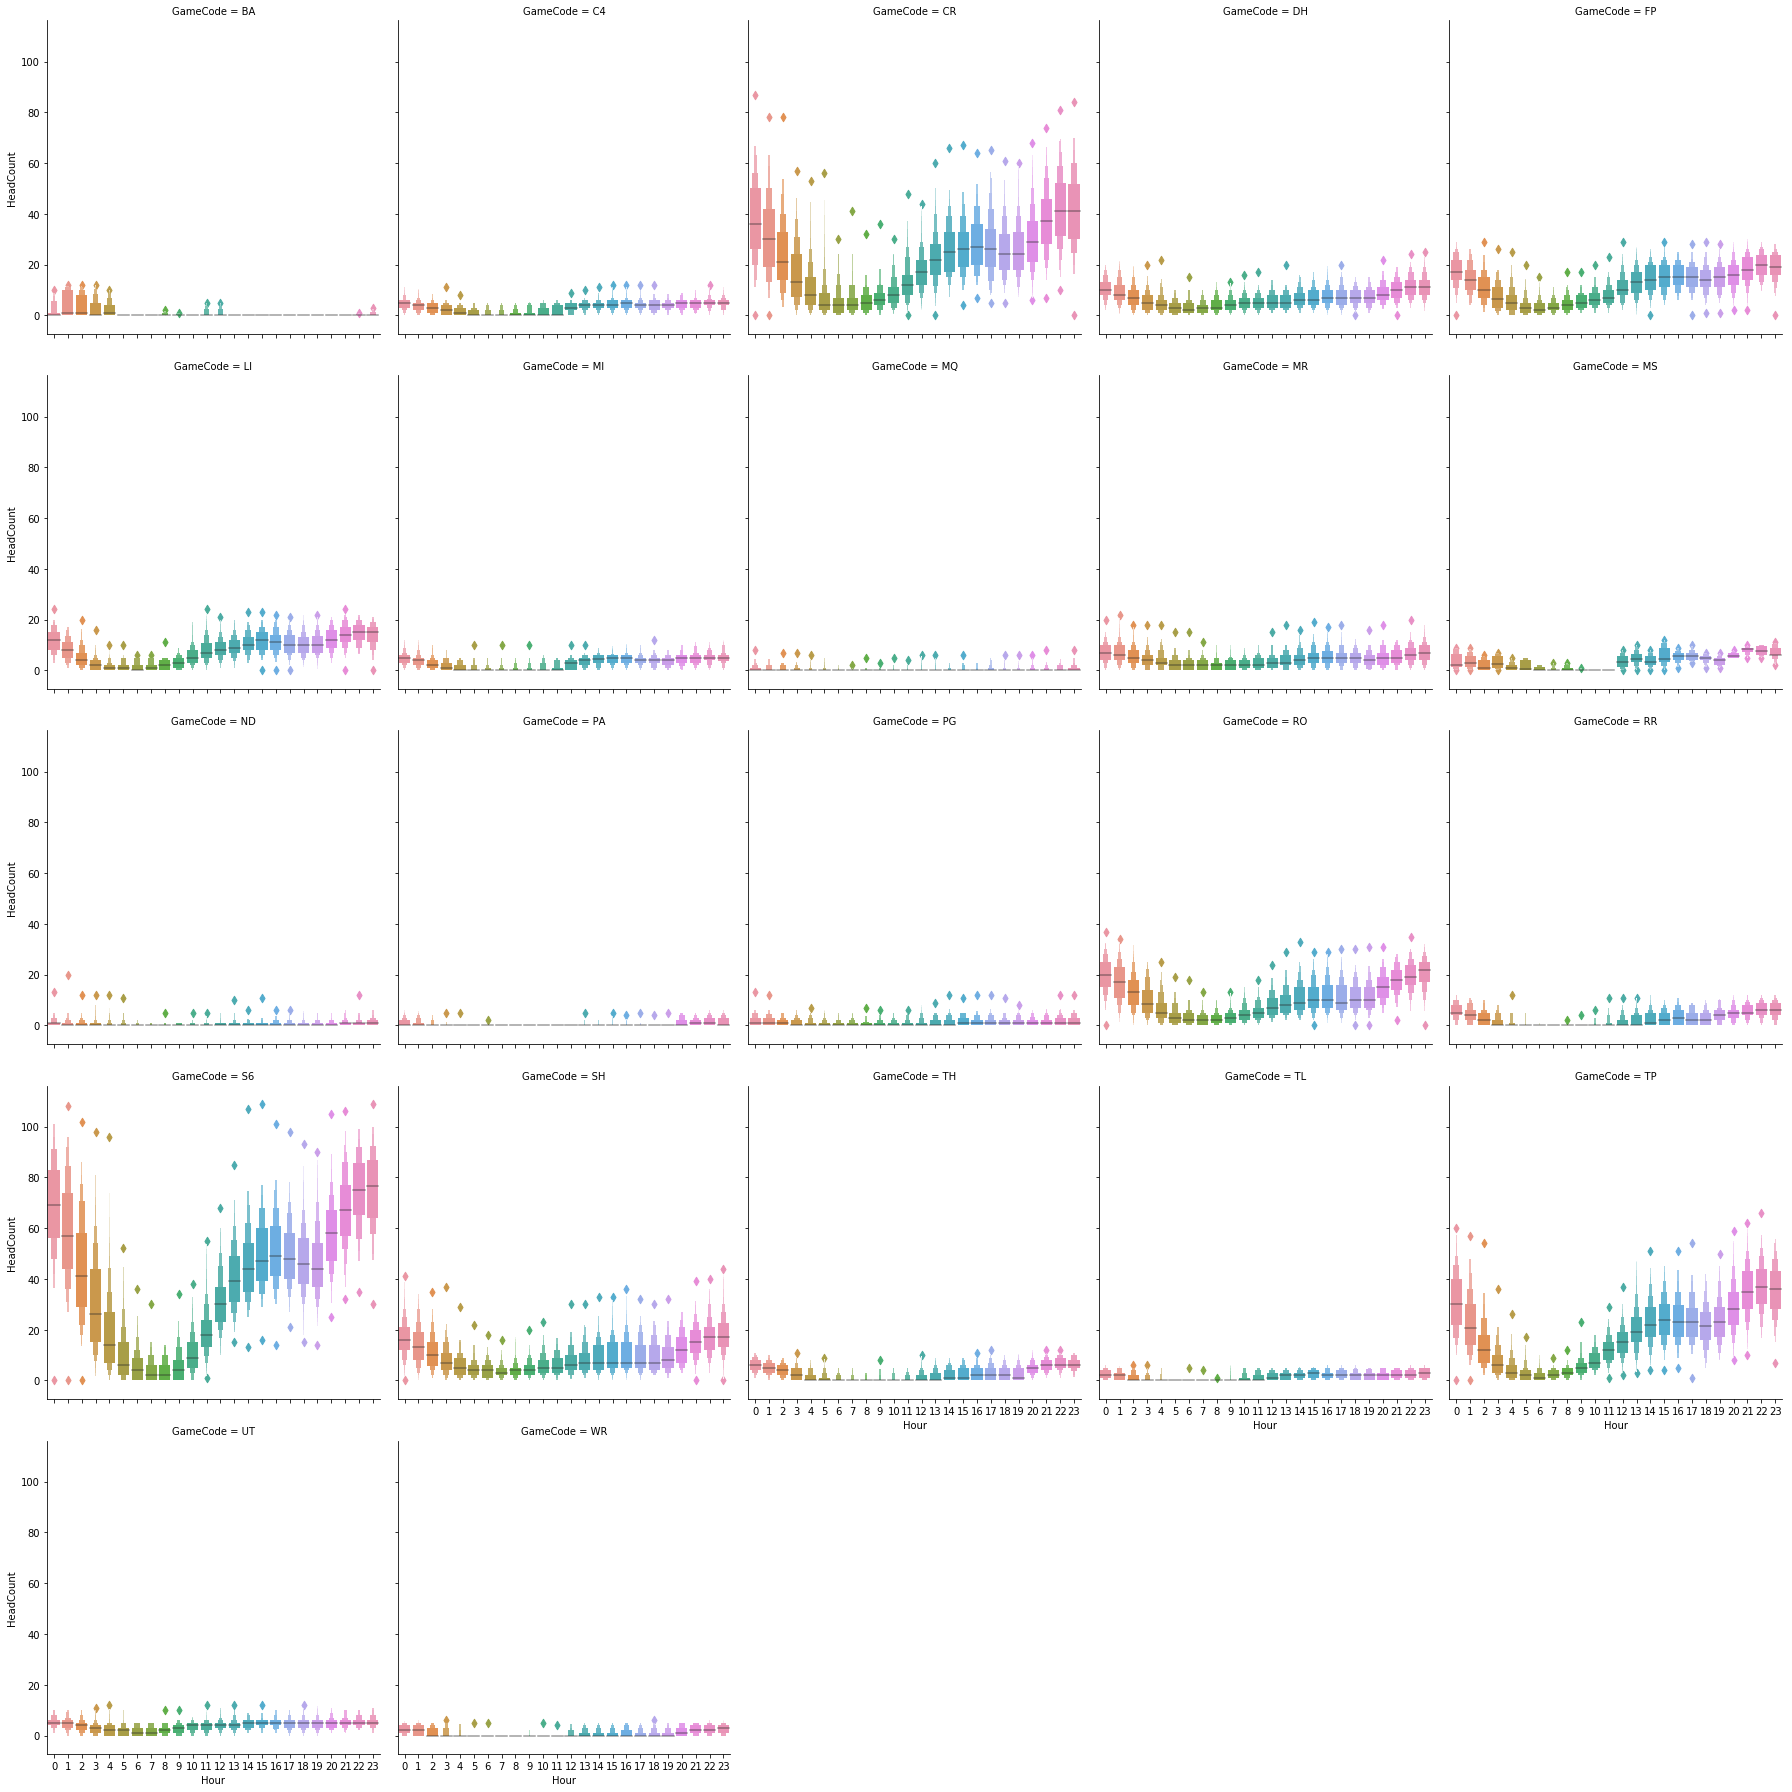

In [8]:
sbn.catplot(x = "Hour", y = "HeadCount", data = jitter_head, col = "GameCode", col_wrap = 5, kind = "boxen")

It appears that the most popular times are roughly the same for each game.

I"m curious about combining game types - is there anything to be learned from adding together all the blackjack variants, the poker variants, pai gow, etc?

In [9]:
jitter_head.loc[:,"Baccarats"] = jitter_head.loc[:,'GameCode'].isin(['BA', 'MR']).astype(int)
jitter_head.loc[:,"BlackJacks"] = jitter_head.loc[:,'GameCode'].isin(['C4', 'DH', 'MQ', 'ND', 'SH', 'TH', 'TL']).astype(int)
jitter_head.loc[:,'Pokers'] = jitter_head.loc[:,'GameCode'].isin(['FP', 'LI', 'MI', 'TP', 'UT','MS']).astype(int)
jitter_head.loc[:,'Roulettes'] = jitter_head.loc[:,'GameCode'].isin(['RO', 'RR']).astype(int)
jitter_head.loc[:,'Craps'] = jitter_head.loc[:,'GameCode'].isin(['CR']).astype(int)
jitter_head.loc[:,'PaiGow']= jitter_head.loc[:,'GameCode'].isin(['PA','PG']).astype(int)
jitter_head.loc[:,'BigSix']= jitter_head.loc[:,'GameCode'].isin(['S6']).astype(int)
jitter_head.loc[:,'War']= jitter_head.loc[:,'GameCode'].isin(['WR']).astype(int)
another = jitter_head.groupby(['DayOfWeek', 'Hour','GameCode']).sum().reset_index()

print(another.head())
print(another.shape)
##print(group_jitter.axes[0].tolist())
##print(todd.shape)

   DayOfWeek  Hour GameCode  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0          1     0       BA          1           1             0         10   
1          1     0       C4         62          65             0        267   
2          1     0       CR        303         306             6       2603   
3          1     0       DH        251         299            17        718   
4          1     0       FP        252         260             0       1125   

   DayNumber  Baccarats  BlackJacks  Pokers  Roulettes  Craps  PaiGow  BigSix  \
0         49          1           0       0          0      0       0       0   
1       9646          0          52       0          0      0       0       0   
2       9646          0           0       0          0     52       0       0   
3       9646          0          52       0          0      0       0       0   
4       9646          0           0      52          0      0       0       0   

   War  
0    0  
1    0  
2    0  
3 

The "another" object above combines all days and sums them - so there are fewer data points. This sums all of the headcount, tables open tables closed, and tables occupied for every week day/hour. It smoothes out some of the variation for the year - only detailing hours and days of the week (that is there are 7 data points for each day/hour combination).

Let's look at the Baccarats and see if there is anything to learn from their combination - both at the summed "another" level and at the individual data point per hour for every day of the year. 

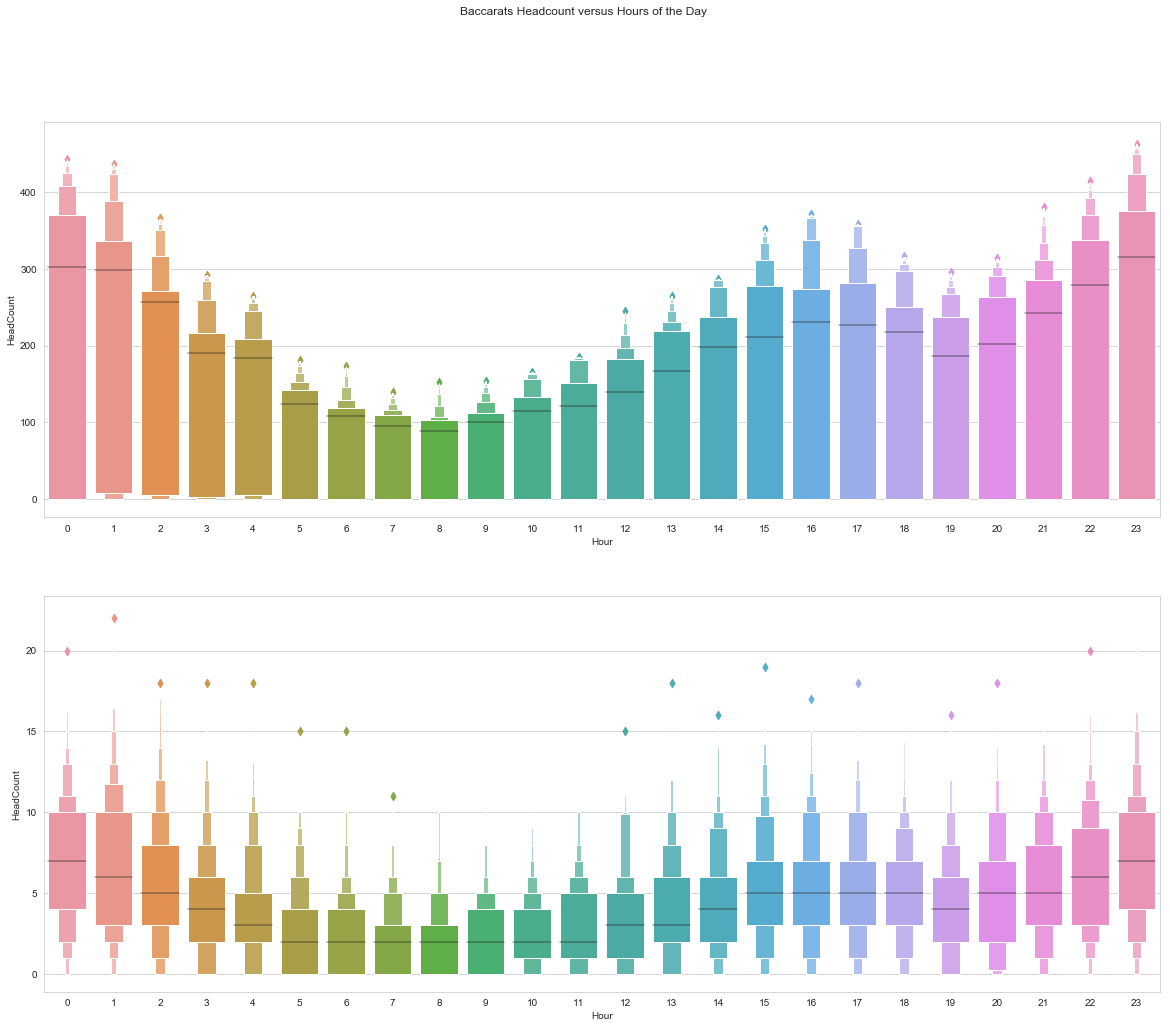

In [24]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.suptitle("Baccarats Headcount versus Hours of the Day")
Baccarats = another.query('Baccarats > 0')
sbn.set_style("whitegrid")

sbn.boxenplot(x = 'Hour', y = 'HeadCount',  data =  Baccarats, ax = ax1)
Baccaratz = jitter_head.query('Baccarats ==1')
sbn.boxenplot(x = 'Hour', y = 'HeadCount',  data =  Baccaratz, ax = ax2)

Now let's look at the Baccarats via the Days of the Week

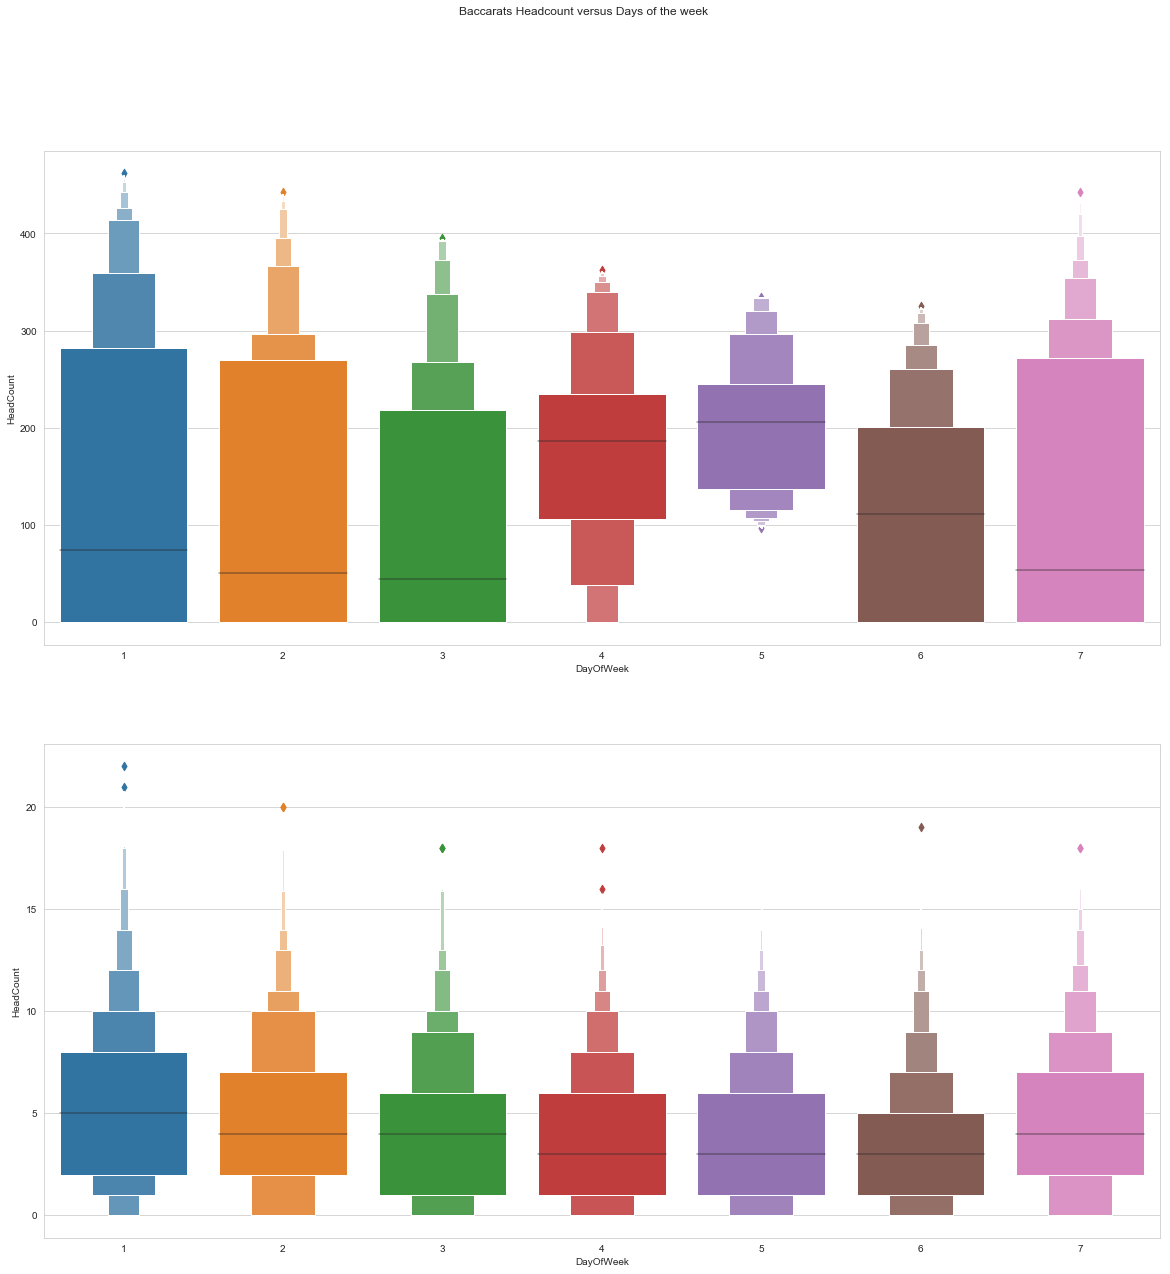

In [26]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.suptitle("Baccarats Headcount versus Days of the week")
Baccarats_Day = another.query('Baccarats > 0')
sbn.set_style("whitegrid")

sbn.boxenplot(x = 'DayOfWeek', y = 'HeadCount',  data =  Baccarats_Day, ax = ax1)
Baccaratz_Day = jitter_head.query('Baccarats ==1')
sbn.boxenplot(x = 'DayOfWeek', y = 'HeadCount',  data =  Baccaratz_Day, ax = ax2)

There is always someone playing Baccarat on Thursday, while the other days of the week don't have that non-zero consistency. 


I'm really interested compare the tables opened versus occupied. I will make a plot of the differential between tables open and tables occupied.

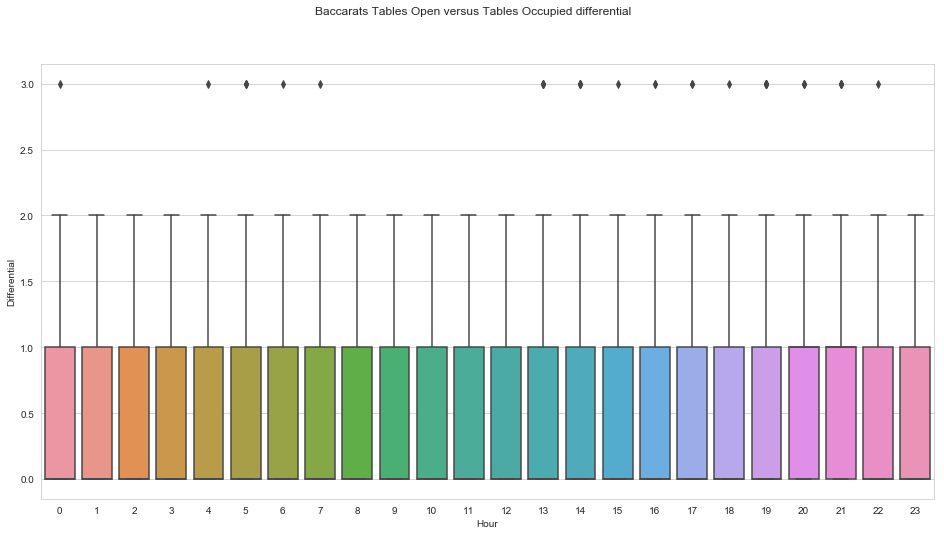

In [42]:
fig = plt.figure(figsize = (16,8))
##ax1 = fig.add_subplot(211)
##ax2 = fig.add_subplot(212)

fig.suptitle("Baccarats Tables Open versus Tables Occupied differential")
Baccarats_Tables = another.query('Baccarats > 0')
sbn.set_style("whitegrid")

##sbn.boxplot(x = 'Hour', y = 'Differential', data =  Baccarats_Tables, ax = ax1)
jitter_head.loc[:,"Differential"]= jitter_head.loc[:,"TablesOpen"] - jitter_head.loc[:,"TablesOcc"]
Baccaratz_Tables = jitter_head.query('Baccarats ==1')
sbn.boxplot(x = 'Hour', y = 'Differential', data =  Baccaratz_Tables)

Looking at the above, the are times when three more tables are open than occupied, but the general difference is no more than 1.I wonder what a category plot of the differentials versus game code would reveal...

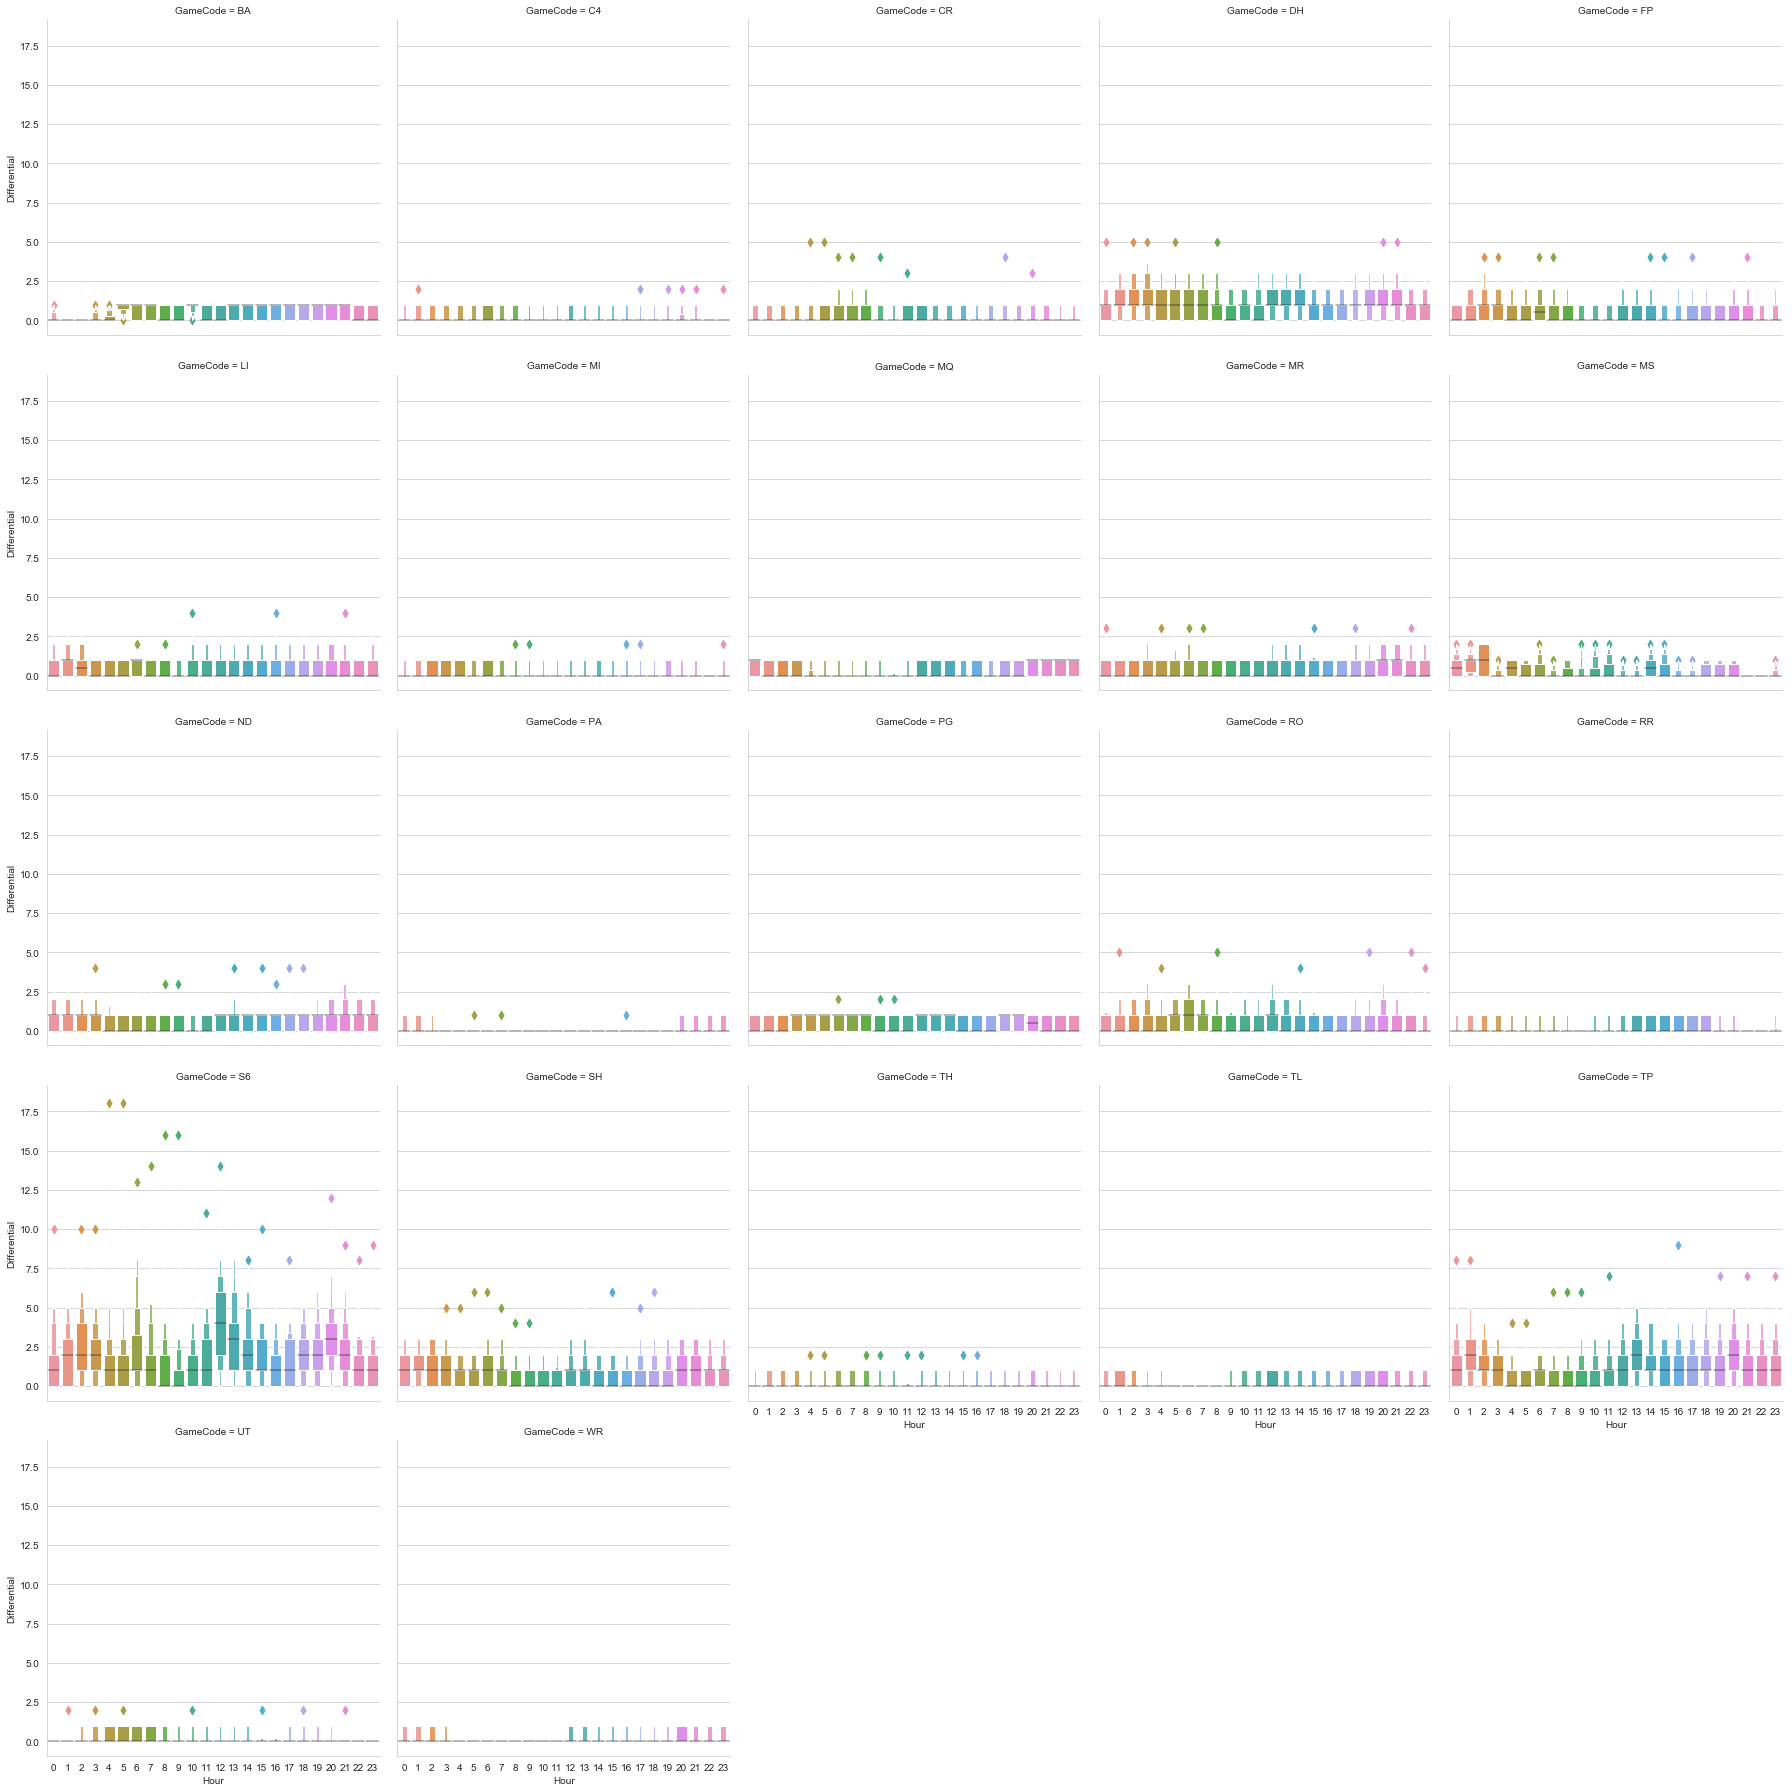

In [43]:
sbn.catplot(x = "Hour", y = "Differential", data = jitter_head, col = "GameCode", col_wrap = 5, kind = "boxen")

Big Six appears to have a large differential. Let's drill in on that. And also look at TP - 

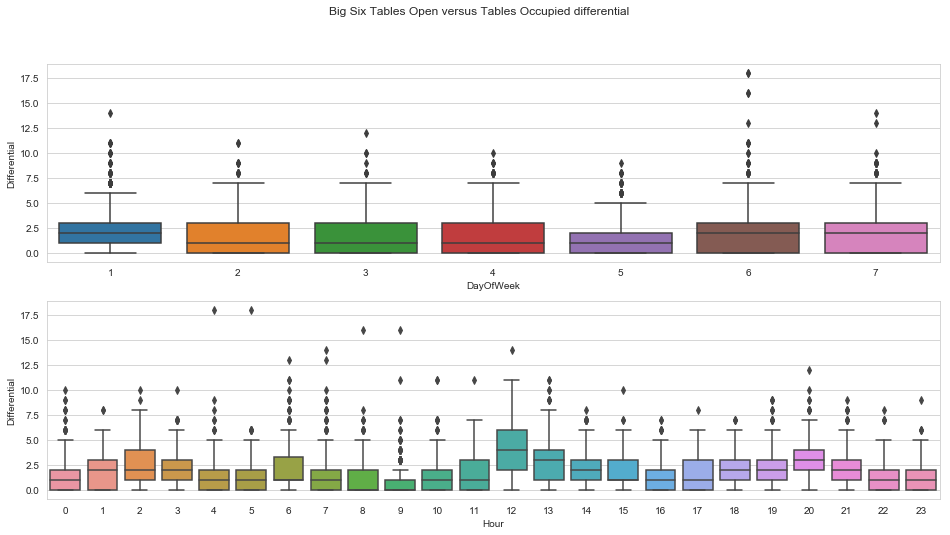

In [50]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
another.loc[:,"Differential"]= another.loc[:,"TablesOpen"] - another.loc[:,"TablesOcc"]
fig.suptitle("Big Six Tables Open versus Tables Occupied differential")
Big6_Tables = another.query('BigSix > 0')
BigSix_Tables = jitter_head.query('BigSix ==1')
sbn.set_style("whitegrid")

sbn.boxplot(x = 'DayOfWeek', y = 'Differential', data =  BigSix_Tables, ax = ax1)
jitter_head.loc[:,"Differential"]= jitter_head.loc[:,"TablesOpen"] - jitter_head.loc[:,"TablesOcc"]

sbn.boxplot(x = 'Hour', y = 'Differential', data =  BigSix_Tables, ax = ax2)

Does the headcount vary unusually on Fridays (Day 6) or at noon(12)?  Let's look closer at that.

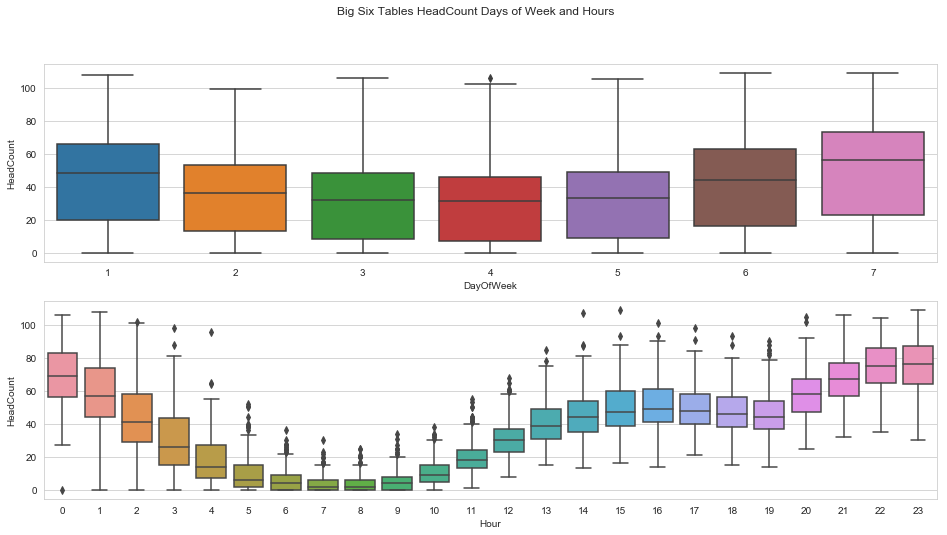

In [51]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
another.loc[:,"Differential"]= another.loc[:,"TablesOpen"] - another.loc[:,"TablesOcc"]
fig.suptitle("Big Six Tables HeadCount Days of Week and Hours")
Big6_Tables = another.query('BigSix > 0')
BigSix_Tables = jitter_head.query('BigSix ==1')
sbn.set_style("whitegrid")

sbn.boxplot(x = 'DayOfWeek', y = 'HeadCount', data =  BigSix_Tables, ax = ax1)
jitter_head.loc[:,"Differential"]= jitter_head.loc[:,"TablesOpen"] - jitter_head.loc[:,"TablesOcc"]

sbn.boxplot(x = 'Hour', y = 'HeadCount', data =  BigSix_Tables, ax = ax2)

No, the headcount appears cyclical in the same way as the other are. The pit boss needs to do a better job opening and closing the Bix Six wheel at noon.

I'd also like to look at TP - Texas Hold'Em. IT had the next-largest differential

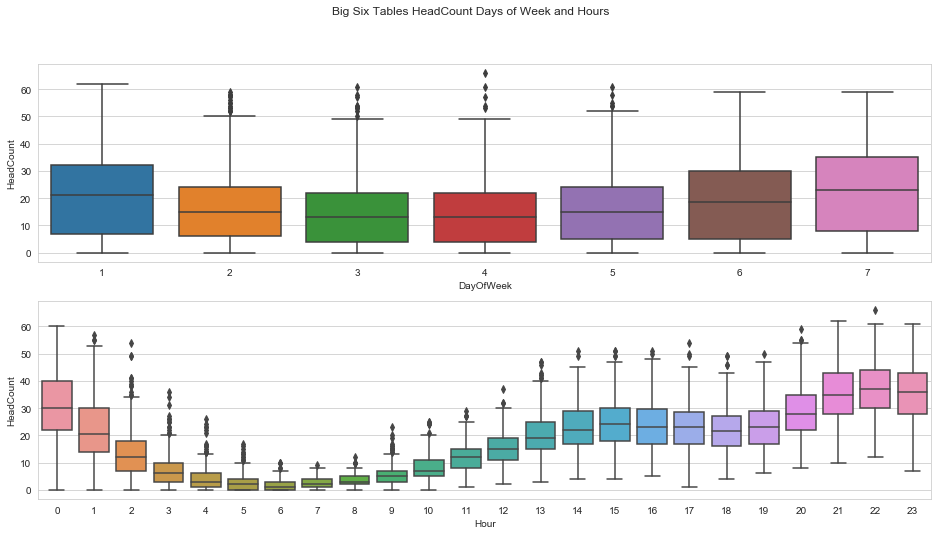

In [71]:
jitter_head.loc[:,'TexasP'] = jitter_head.loc[:,'GameCode'] == 'TP'
jitter_head.loc[:,'TexasP'] = jitter_head.loc[:,'TexasP'].astype(int)
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
another.loc[:,"Differential"]= another.loc[:,"TablesOpen"] - another.loc[:,"TablesOcc"]
fig.suptitle("Texas Hold Em Tables HeadCount Days of Week and Hours")
##TP_Tables = another.query('TexasP > 0')
TPjitter_Tables = jitter_head.query('TexasP == 1')
sbn.set_style("whitegrid")

sbn.boxplot(x = 'DayOfWeek', y = 'HeadCount', data =  TPjitter_Tables, ax = ax1)
jitter_head.loc[:,"Differential"]= jitter_head.loc[:,"TablesOpen"] - jitter_head.loc[:,"TablesOcc"]

sbn.boxplot(x = 'Hour', y = 'HeadCount', data =  TPjitter_Tables, ax = ax2)
##print(jitter_head.head())

Let's look at the differential now in the tables


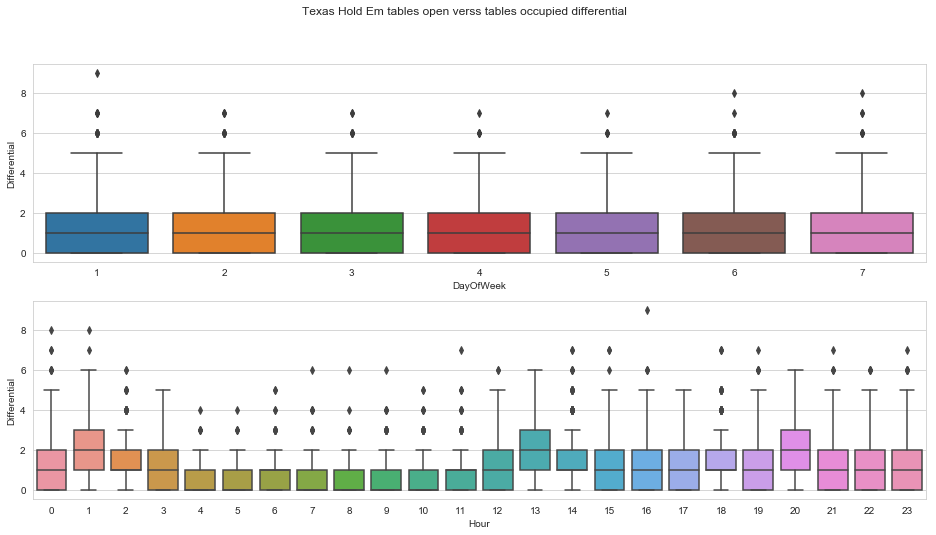

In [73]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
another.loc[:,"Differential"]= another.loc[:,"TablesOpen"] - another.loc[:,"TablesOcc"]
fig.suptitle("Texas Hold Em tables open verss tables occupied differential")
TPjitter_Tables = jitter_head.query('TexasP == 1')
sbn.set_style("whitegrid")

sbn.boxplot(x = 'DayOfWeek', y = 'Differential', data =  TPjitter_Tables, ax = ax1)
jitter_head.loc[:,"Differential"]= jitter_head.loc[:,"TablesOpen"] - jitter_head.loc[:,"TablesOcc"]

sbn.boxplot(x = 'Hour', y = 'Differential', data =  TPjitter_Tables, ax = ax2)

I'd like to look at the combined games (all the pokers, all the blackjacks) and see if there's anything to learn there.



<Figure size 1152x576 with 0 Axes>

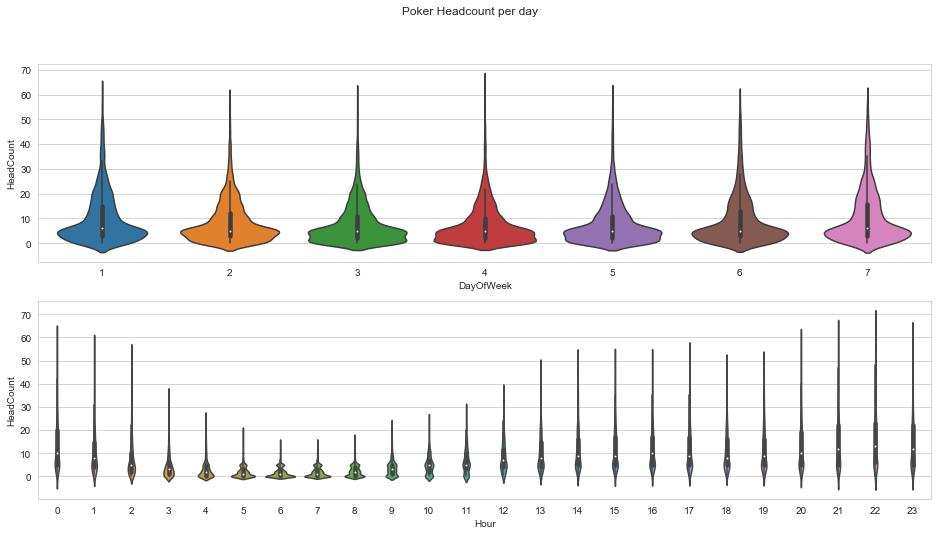

In [78]:
fig = plt.figure(figsize = (16,8))
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.suptitle("Poker Headcount per day")
Pokerjit_Tables = jitter_head.query('Pokers == 1')
sbn.violinplot(x = 'DayOfWeek', y = 'HeadCount', data =  Pokerjit_Tables, ax = ax1)
Pokeran_Tables = another.query('Pokers > 1')
sbn.violinplot(x = 'Hour', y = 'HeadCount', data =  Pokerjit_Tables, ax = ax2)

We see a lot of large swings when combining pokers, but the 

<Figure size 1152x576 with 0 Axes>

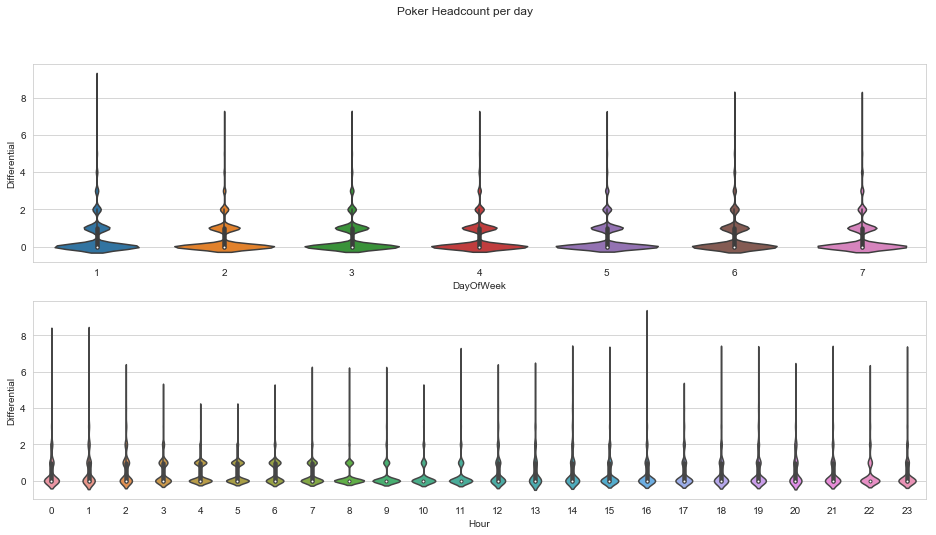

In [80]:
fig = plt.figure(figsize = (16,8))
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.suptitle("Poker Headcount per day")
Pokerjit_Tables = jitter_head.query('Pokers == 1')
sbn.violinplot(x = 'DayOfWeek', y = 'Differential', data =  Pokerjit_Tables, ax = ax1)
Pokeran_Tables = another.query('Pokers > 1')
sbn.violinplot(x = 'Hour', y = 'Differential', data =  Pokerjit_Tables, ax = ax2)

There is a larger differential in tables opened versus occupied - but we are talking multiple games, each needing a unique table. So this data is not surprising.

## Summary

It appears that Craps, Big Six, and Texas Hold 'em are the most popular games. The table management (opening and closing) looks to be well-aligned with demand in Craps and most of the other games. But with Big Six and Texas Hold 'Em there are often many more tables opened than there is demand. These games need to be managed better. They appear to be especially in need of better management around noon. 